In [4]:
import sys 
sys.path.append('./../../src')

# python shit
from datetime import datetime

# my shit
from lib.stores.mysql import Mysql
from lib.oscillators import macd_over_period, stochastic_over_period
from lib.charts import chart

In [5]:
ticker = 'VST'

mysql = Mysql()

In [7]:
mysql.update_candles(ticker, 60)

,t,o,l,h,c,r,v
t,,,,,,,
0,2020-03-30 14:00:00,15.480,15.91,15.560,15.640,655025.0,0
1,2020-03-30 15:00:00,15.500,16.09,15.870,15.560,410867.0,0
2,2020-03-30 16:00:00,15.840,16.12,16.030,15.850,336807.0,0
3,2020-03-30 17:00:00,15.850,16.12,16.000,16.030,266533.0,0
4,2020-03-30 18:00:00,15.840,16.06,15.960,15.970,297210.0,0
...,...,...,...,...,...,...,...
3,2021-03-29 17:00:00,17.515,17.60,17.555,17.515,569633.0,0
4,2021-03-29 18:00:00,17.550,17.69,17.675,17.560,576152.0,0
5,2021-03-29 19:00:00,17.560,17.74,17.620,17.680,1829500.0,0


In [8]:
data = mysql.get_closes_by_symbol(ticker)

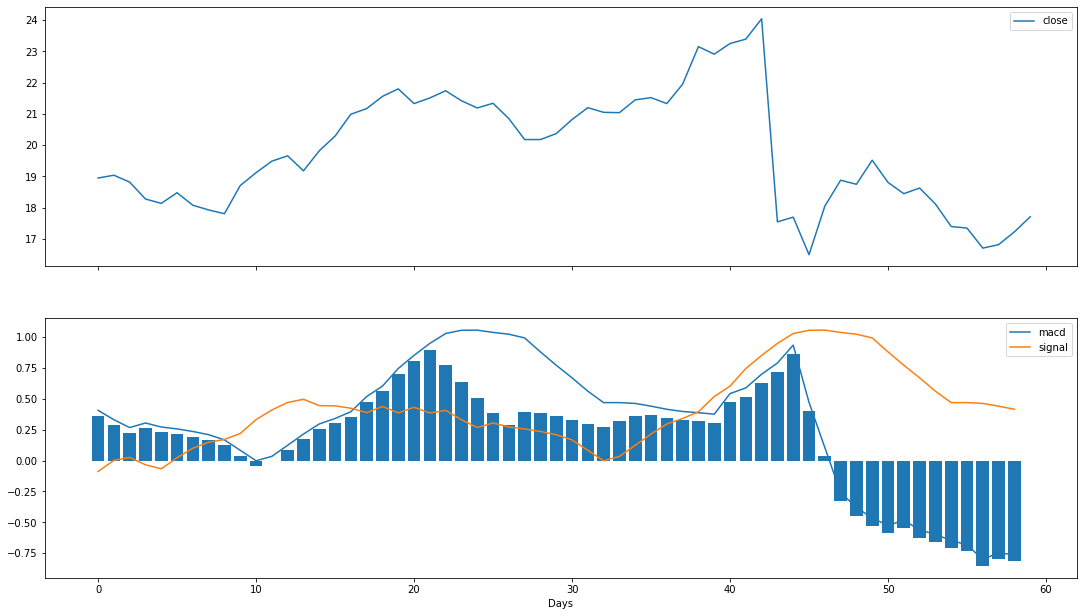

In [9]:
days = 60

chart_data = list(data['c'].tail(days))

macd_vals = macd_over_period(list(data['c']), days)

macd_line = list([i[0] for i in macd_vals])[-1-days:-1]
sig_line = list([i[1] for i in macd_vals])[-1-days:-1]
histo = list([i[2] for i in macd_vals])[-1-days:-1]

oscillator_dicts = [
    { 'chart': 'line', 'data': macd_line, 'label': 'macd' },
    { 'chart': 'line', 'data': sig_line, 'label': 'signal' },
    { 'chart': 'bar', 'data': histo, 'label': ''}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)

In [10]:
stochastic_vals = stochastic_over_period(list(data['c']), days)

fastk_data = list([i[0] for i in stochastic_vals])
slowd_data = list([i[2] for i in stochastic_vals])

oscillator_dicts = [
    { 'chart': 'line', 'data': fastk_data, 'label': 'fastk'},
    { 'chart': 'line', 'data': slowd_data, 'label': 'slowd'}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)

ZeroDivisionError: float division by zero